# Basic data visualization

In [1]:
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot

In [2]:
src = rasterio.open(r"../tests/data/RGB.byte.tif")

### With an open raster, or band or numpy array we can display the map

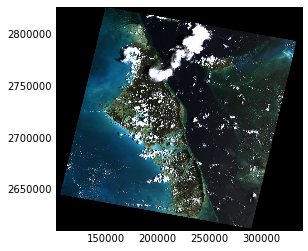

In [3]:
%matplotlib inline
plot.show(src)
#which replaces this, which still didn't have a means of setting the extent 
#plot.show(plot.reshape_as_image(src.read((1,2,3)))

### We can also display a single band of a multiband image by passing a tuple (raster source, band)

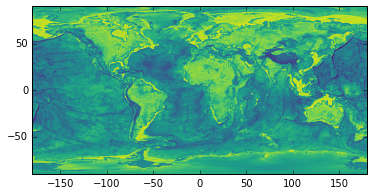

In [4]:
world = rasterio.open(r"../tests/data/world.rgb.tif")
plot.show((world, 2), cmap='viridis')

### side by side:

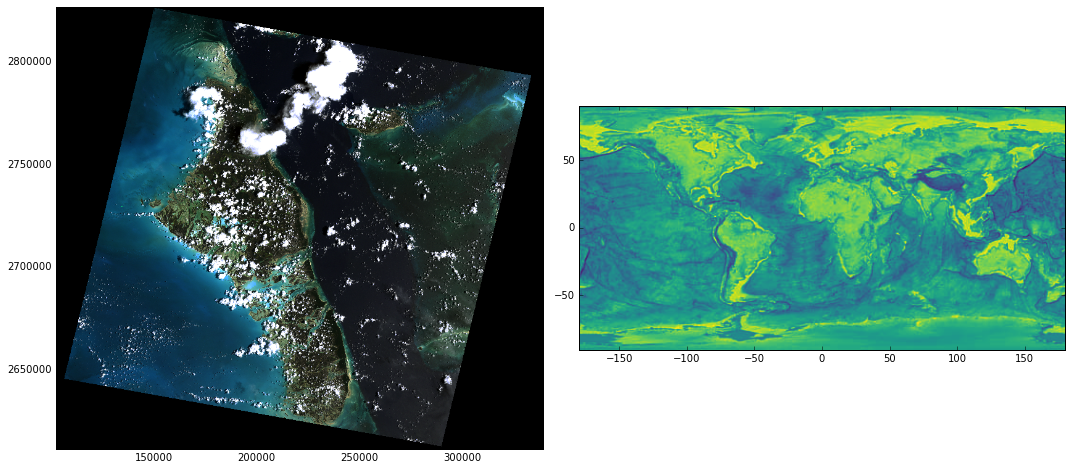

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plot.show(src, ax=ax1)
plot.show((world, 2), cmap='viridis', ax=ax2)
fig.tight_layout()

## all three bands side by side

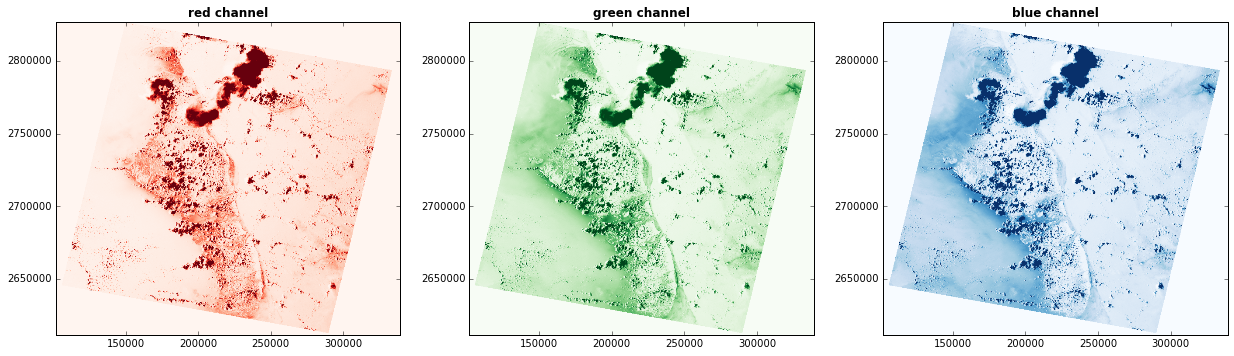

In [6]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
plot.show((src, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((src, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((src, 3), ax=axb, cmap='Blues', title='blue channel')

### How about the same thing but with the ability to navigate simultaneously?

<IPython.core.display.Javascript object>


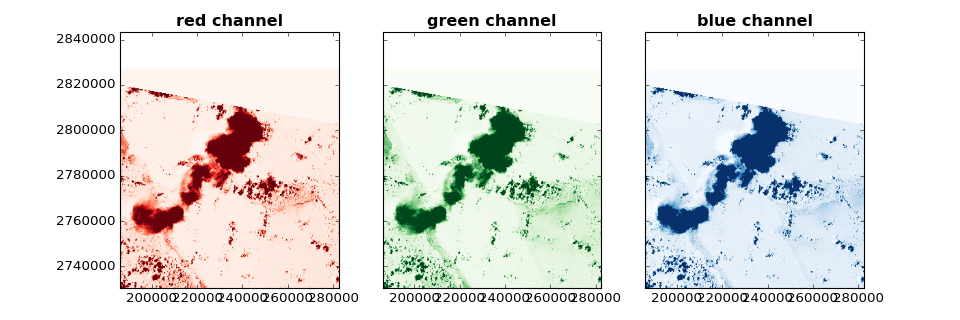

In [14]:
%matplotlib notebook
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(12, 4), sharex=True, sharey=True)
plot.show((src, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((src, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((src, 3), ax=axb, cmap='Blues', title='blue channel')

### If we want to see a histogram of the data we use the plot.show_hist function

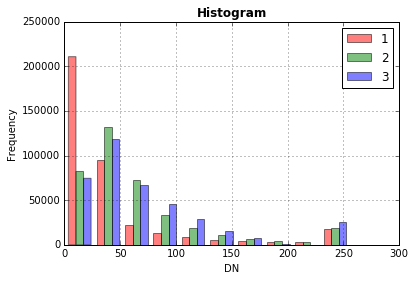

In [8]:
%matplotlib inline
plot.show_hist(src)

### Any of the optional pyplot histogram parameters can be passed to tweak the representation

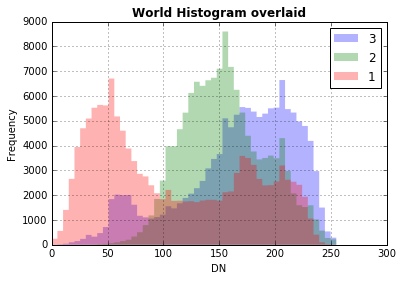

In [9]:
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")

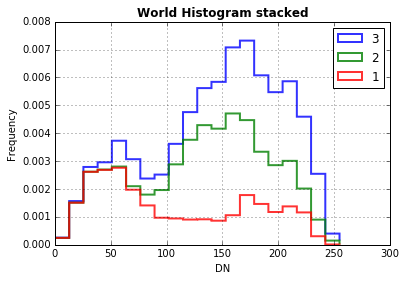

In [10]:
plot.show_hist(world, bins=20, lw=2.0, stacked=True,
               alpha=0.8, histtype='step', normed=True, 
               title="World Histogram stacked")

### See matplotlib.pyplot.hist documentation at http://matplotlib.org/api/pyplot_api.html for a list of these parameters and available options

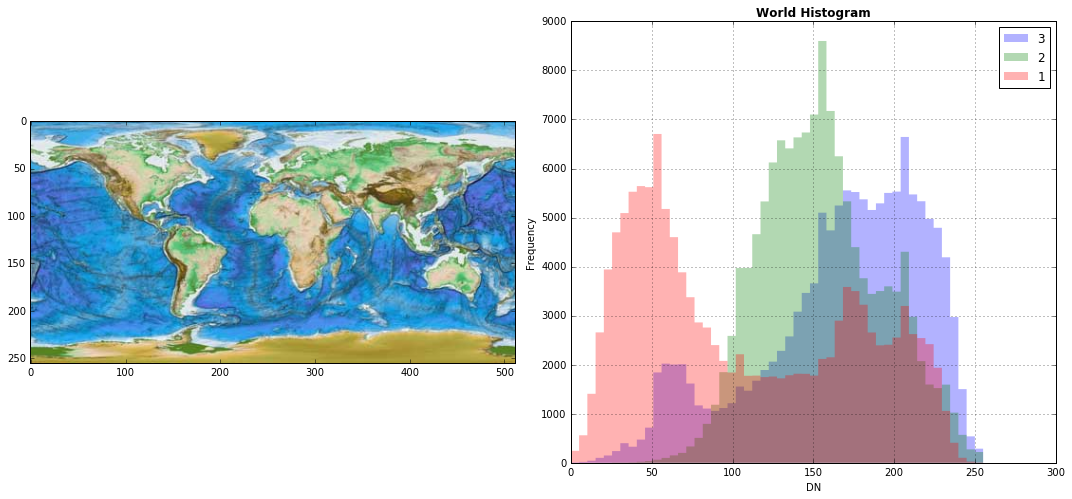

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plot.show(plot.reshape_as_image(world.read((1,2,3), masked=True)), ax=ax1)
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram")
fig.tight_layout()

# Add a rasterio raster to a cartopy geoaxes

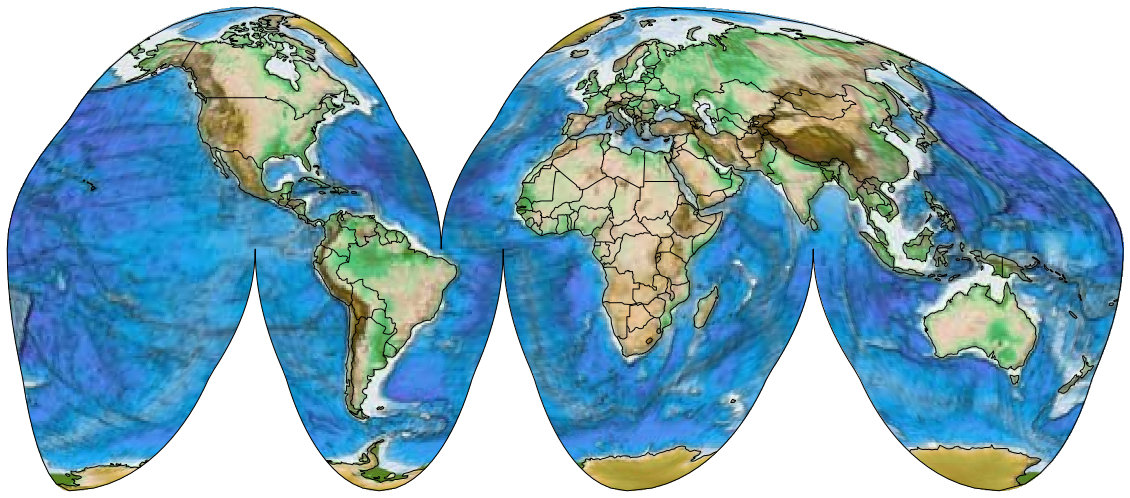

In [13]:
import cartopy
import cartopy.crs as ccrs

fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())

ax.set_global()
plot.show(world, origin='upper', transform=ccrs.PlateCarree(), interpolation=None, ax=ax)
#vs
# ax.imshow(plot.reshape_as_image(world.read((1,2,3), masked=True)), 
#         origin='upper', extent=plot.plotting_extent(world), transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)